# FALL 2020 -> CSE 5334 -> Data Minning
## Assignment 2
### Name:  Tirumala Manukonda (UTA ID# 1001662386)

#### Assignment is to learn about the kNN.

__Summary__:

-  This assignment is about implementation of KNN algorithm with the hyper parameters K values =1,3,5,7 and distance metrics = euclidean distance , euclidean distance and cosine distance
-  Split the data of IRIS into Train ,Development and Test sets
-  Find the optimal parameters using development data set and plot them using barchart for the given hyperparameters
-  Analyse the graph and get optimal hyperparameters, and from the hyperparameters getting the Final accuracy of test-set

In [722]:
import pandas as pd
import numpy as np
import math
from collections import Counter
from random import seed
from random import randrange
import matplotlib
import matplotlib.pyplot as plt

In [723]:
#Reading the csv file from the local folder and displaying top 10 values

df = pd.read_csv("C:/Users/Dell/OneDrive/Documents/Iris.csv",sep=',')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


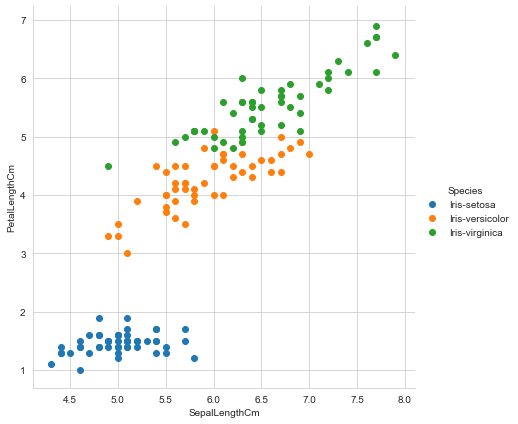

In [724]:
#To visualize the dataset and the labels init wrt to features SepalLengthCm,PetalLengthCm

import seaborn as sns
sns.set_style("whitegrid") 
sns.FacetGrid(df, hue ="Species",  
              height = 6).map(plt.scatter,  
                              'SepalLengthCm',  
                              'PetalLengthCm').add_legend() 


In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [726]:
# view summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [727]:
# Let’s now take a look at the number of instances (rows) that belong to each class.
#We can view this as an absolute count.
df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [728]:
#Sliting the data into train,develop and test datasets
seed(0)
train = df.sample(frac= 0.6, random_state =42)
test_df = df.drop(train.index)
test = test_df.sample(frac= 0.5, random_state =42)
develop = test_df.drop(test.index)

In [729]:
#Selecting features and labels arrays:
X_train = train.iloc[:, 1:5].values
y_train = train.iloc[:, 5].values
X_develop = develop.iloc[:, 1:5].values
y_develop = develop.iloc[:, 5].values
X_test = test.iloc[:, 1:5].values
y_test = test.iloc[:, 5].values

In [730]:
#Label encoder to categorize the target values
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_develop = le.fit_transform(y_develop)
y_test = le.fit_transform(y_test)

In [731]:
#Computes the euclidean distance

def euclidean_distance(a,b):
    distance=np.sqrt(np.dot(a-b,a-b))
    return distance

In [732]:
#Computes the normalized euclidean distance

def normalized_euclidean_distance(a,b):
    distance=0.5 *np.sqrt(np.dot(a-b,a-b))
    return distance

In [733]:
#Computes the cosine distance

def cosine_distance(a,b):
    distance=1-np.dot(a,b)/np.sqrt(np.dot(a,a)*np.dot(b,b))
    return distance

In [734]:
#KNN algorithm with the generalised metrics k and distance

class KNearestNeighbors(object):
    
    def __init__(self,k,distance):
        self.k=k
        self.distance=distance
        self.X_train=np.asarray([])
        self.y_train=np.asarray([])
        
    def fit(self,X,y):
        self.X_train=X
        self.y_train=y
        
    def predict(self,X):
        X=X.reshape((-1,self.X_train.shape[1]))
        distances=np.zeros((X.shape[0],self.X_train.shape[0]))
        for i,x in enumerate(X):
            for j,x_train in enumerate(self.X_train):
                distances[i,j]=self.distance(x_train,x)
        sorted_indices=distances.argsort()[:,:self.k]
        top_k = self.y_train[sorted_indices]  
        result = np.zeros(X.shape[0])
        for i, values in enumerate(top_k):
            result[i] = Counter(values).most_common(1)[0][0]
        return result

In [735]:
# Calculate accuracy percentage between two lists
def accuracy_metric(actual, predicted):
    correct= 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [736]:
# Fitting clasifier to the Development set
knn = KNearestNeighbors(1, euclidean_distance)
knn.fit(X_train, y_train)

In [737]:
# Predicting the Development and test data set results
y_pred_develop = knn.predict(X_develop)
y_pred_test = knn.predict(X_test)

In [738]:
#Getting the Accuracy of the Development data set
Dev_Accuracy=[]
Dev_Accuracy = accuracy_metric(y_develop,y_pred_develop )
print('Development data set Accuracy of k =1 and d = euclidean distance:'+repr(Dev_Accuracy)+'%')

Development data set Accuracy of k =1 and d = euclidean distance:90.0%


- This is the starting combination of the hyperparameters of k=1 and distance = euclidean distance, and below will check the given k values and its accuracy wrt to distance metrics

In [739]:
# Now calculating with hyperparameters of k=3 and distance = euclidean distance
knn = KNearestNeighbors(3, euclidean_distance)
knn.fit(X_train, y_train)
y_pred_develop = knn.predict(X_develop)
y_pred_test = knn.predict(X_test)
Dev_Accuracy = accuracy_metric(y_develop, y_pred_develop)
print('Development data set Accuracy of k = 3 and d = euclidean distance:'+repr(Dev_Accuracy)+'%')


Development data set Accuracy of k = 3 and d = euclidean distance:93.33333333333333%


In [740]:
# Now calculating with hyperparameters of k=5 and distance = euclidean distance
knn = KNearestNeighbors(5, euclidean_distance)
knn.fit(X_train, y_train)
y_pred_develop = knn.predict(X_develop)
y_pred_test = knn.predict(X_test)
Dev_Accuracy = accuracy_metric(y_develop, y_pred_develop)
print('Development data set Accuracy of k = 5 and d = euclidean distance:'+repr(Dev_Accuracy)+'%')

Development data set Accuracy of k = 5 and d = euclidean distance:93.33333333333333%


In [741]:
# Now calculating with hyperparameters of k=7 and distance = euclidean distance
knn = KNearestNeighbors(7, euclidean_distance)
knn.fit(X_train, y_train)
y_pred_develop = knn.predict(X_develop)
y_pred_test = knn.predict(X_test)
Dev_Accuracy = accuracy_metric(y_develop, y_pred_develop)
print('Development data set Accuracy of k = 7 and d = euclidean distance:'+repr(Dev_Accuracy)+'%')

Development data set Accuracy of k = 7 and d = euclidean distance:93.33333333333333%


In [742]:
# Now calculating with hyperparameters of k=1 and distance = normalized_euclidean_distance
knn = KNearestNeighbors(1, normalized_euclidean_distance)
knn.fit(X_train, y_train)
y_pred_develop = knn.predict(X_develop)
y_pred_test = knn.predict(X_test)
Dev_Accuracy = accuracy_metric(y_develop, y_pred_develop)
print('Development data set Accuracy of k = 1 and d =  normalized_euclidean_distance:'+repr(Dev_Accuracy)+'%')

Development data set Accuracy of k = 1 and d =  normalized_euclidean_distance:90.0%


In [743]:
# Now calculating with hyperparameters of k=3 and distance = normalized_euclidean_distance
knn = KNearestNeighbors(3, normalized_euclidean_distance)
knn.fit(X_train, y_train)
y_pred_develop = knn.predict(X_develop)
y_pred_test = knn.predict(X_test)
Dev_Accuracy = accuracy_metric(y_develop, y_pred_develop)
print('Development data set Accuracy of k = 3 and d =  normalized_euclidean_distance:'+repr(Dev_Accuracy)+'%')

Development data set Accuracy of k = 3 and d =  normalized_euclidean_distance:93.33333333333333%


In [744]:
# Now calculating with hyperparameters of k=5 and distance = normalized_euclidean_distance
knn = KNearestNeighbors(5, normalized_euclidean_distance)
knn.fit(X_train, y_train)
y_pred_develop = knn.predict(X_develop)
y_pred_test = knn.predict(X_test)
Dev_Accuracy = accuracy_metric(y_develop, y_pred_develop)
print('Development data set Accuracy of k = 5 and d =  normalized_euclidean_distance:'+repr(Dev_Accuracy)+'%')

Development data set Accuracy of k = 5 and d =  normalized_euclidean_distance:93.33333333333333%


In [745]:
# Now calculating with hyperparameters of k=7 and distance = normalized_euclidean_distance
knn = KNearestNeighbors(7, normalized_euclidean_distance)
knn.fit(X_train, y_train)
y_pred_develop = knn.predict(X_develop)
y_pred_test = knn.predict(X_test)
Dev_Accuracy = accuracy_metric(y_develop, y_pred_develop)
print('Development data set Accuracy of k = 7 and d =  normalized_euclidean_distance:'+repr(Dev_Accuracy)+'%')

Development data set Accuracy of k = 7 and d =  normalized_euclidean_distance:93.33333333333333%


In [746]:
# Now calculating with hyperparameters of k=1 and distance = cosine_distance
knn = KNearestNeighbors(1, cosine_distance)
knn.fit(X_train, y_train)
y_pred_develop = knn.predict(X_develop)
y_pred_test = knn.predict(X_test)
Dev_Accuracy = accuracy_metric(y_develop, y_pred_develop)
print('Development data set Accuracy of k = 1 and d =  cosine_distance:'+repr(Dev_Accuracy)+'%')

Development data set Accuracy of k = 1 and d =  cosine_distance:96.66666666666667%


In [747]:
# Now calculating with hyperparameters of k=3 and distance = cosine_distance
knn = KNearestNeighbors(3, cosine_distance)
knn.fit(X_train, y_train)
y_pred_develop = knn.predict(X_develop)
y_pred_test = knn.predict(X_test)
Dev_Accuracy = accuracy_metric(y_develop, y_pred_develop)
print('Development data set Accuracy of k = 3 and d =  cosine_distance:'+repr(Dev_Accuracy)+'%')

Development data set Accuracy of k = 3 and d =  cosine_distance:96.66666666666667%


In [748]:
# Now calculating with hyperparameters of k=5 and distance = cosine_distance
knn = KNearestNeighbors(5, cosine_distance)
knn.fit(X_train, y_train)
y_pred_develop = knn.predict(X_develop)
y_pred_test = knn.predict(X_test)
Dev_Accuracy = accuracy_metric(y_develop, y_pred_develop)
print('Development data set Accuracy of k = 5 and d =  cosine_distance:'+repr(Dev_Accuracy)+'%')

Development data set Accuracy of k = 5 and d =  cosine_distance:96.66666666666667%


In [749]:
# Now calculating with hyperparameters of k=7 and distance = cosine_distance
knn = KNearestNeighbors(7, cosine_distance)
knn.fit(X_train, y_train)
y_pred_develop = knn.predict(X_develop)
y_pred_test = knn.predict(X_test)
Dev_Accuracy = accuracy_metric(y_develop, y_pred_develop)
print('Development data set Accuracy of k = 7 and d =  cosine_distance:'+repr(Dev_Accuracy)+'%')

Development data set Accuracy of k = 7 and d =  cosine_distance:96.66666666666667%


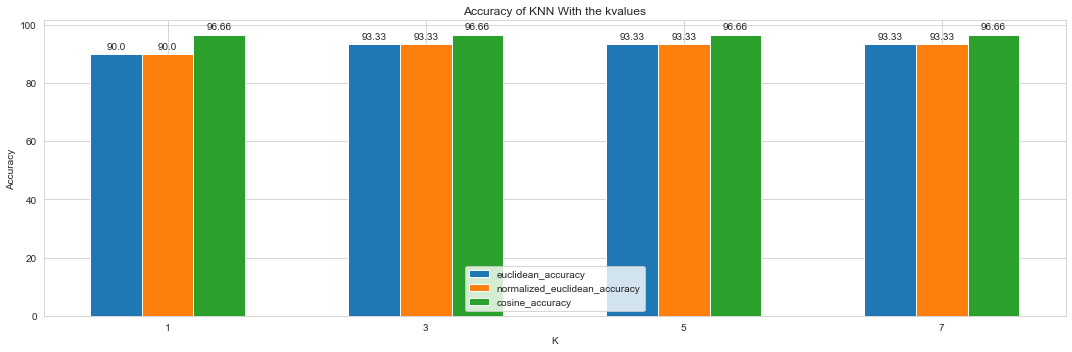

In [750]:
# I am taking the values of all the accuaricies and plotting them wrt to k and distance metrics

labels = ['1', '3', '5', '7']
euclidean_accuracy = [90, 93.33, 93.33,93.33]
normalized_euclidean_accuracy = [90, 93.33, 93.33,93.33]
cosine_accuracy = [96.66, 96.66, 96.66, 96.66]
x = np.arange(len(labels))  
width =0.2 

fig, ax = plt.subplots(figsize=(15, 5))
rects1 = ax.bar(x - width, euclidean_accuracy, width, label='euclidean_accuracy')
rects2 = ax.bar(x, normalized_euclidean_accuracy, width, label='normalized_euclidean_accuracy')
rects3 = ax.bar(x + width, cosine_accuracy, width, label='cosine_accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('K')
ax.set_title('Accuracy of KNN With the kvalues')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


fig.tight_layout()

plt.show()


#### _Analysis_ :-

- KMetrics :- optimal value of k would be = 5, From the above barchart, we can understand that my model more consistent
  from k=3 and there shouldn't be any overfit with small k values and underfit with higher values of k, i will consider k=5 as the optimal parameter.
  
  
- Distance Metric:- Cosine distance measure would be optimal, As we seen from the graph cosine metrics gave me better and   
  consistent values compared to the euclidean and normalized euclidean distance..

- Optimal Hyper parameters are k=5, and Cosine Distance
    

In [752]:
#calculating test accuracy with optimal hyperparameters of above observation of k=5 and distance = cosine_distance
knn = KNearestNeighbors(5, cosine_distance)
knn.fit(X_train, y_train)
y_pred_develop = knn.predict(X_develop)
y_pred_test = knn.predict(X_test)
#Getting the Accuracy of the test dataset
Final_Test_Accuracy = accuracy_metric(y_test,y_pred_test)
print('Final Test data set Accuracy:'+repr(Final_Test_Accuracy)+'%')

Final Test data set Accuracy:96.66666666666667%


#### _Final Accuracy_ :
- Final test accuracy for the test data is 96.66666666666667%, which says that our performence is consistent on test data as it   gave me same accuracy of developement data set for the optimal parameters of developementset